# 1. Data reading and exploration

In [1]:
import pandas as pd

# Read in the song database .csv file. It's important to specify the encoding type
df = pd.read_csv('rbdb.csv', encoding='latin')

In [2]:
# Take a peek at the last 10 entries (first few entries are of songs to be announced)
df.tail(10)

,RBDB ID,Shortname,Title,Artist,Cover,Length,Year,Genre,BPM,Album,...,Keys Tier,Keys Rank,Keys Solos,Pro Guitar Tier,Pro Guitar Rank,Pro Bass Tier,Pro Bass Rank,Pro Keys Tier,Pro Keys Rank,Sources
2769,1275,cherrybomb,Cherry Bomb,The Runaways,YES,2:22,1976.0,Punk,138.0,NaN,...,7,0,0,7,0,7,0,7,0,DLC
2770,1287,tomsawyer,Tom Sawyer,Rush,YES,4:52,1981.0,Prog,87.0,NaN,...,7,0,0,7,0,7,0,7,0,Rock Band 1
2771,1333,cherubrock,Cherub Rock,Smashing Pumpkins,NaN,5:05,1993.0,Alternative,92.0,Siamese Dream,...,7,0,0,7,0,7,0,7,0,Rock Band 1
2772,1357,blackholesun,Black Hole Sun,Soundgarden,NaN,5:34,1994.0,Grunge,51.0,Superunknown,...,7,0,0,7,0,7,0,7,0,Rock Band 1
2773,1426,vasoline,Vasoline,Stone Temple Pilots,NaN,3:01,1994.0,Alternative,85.0,Purple,...,7,0,0,7,0,7,0,7,0,Rock Band 1
2774,1446,ballroomblitz,Ballroom Blitz,Sweet,YES,4:06,1975.0,Glam,218.0,NaN,...,7,0,0,7,0,7,0,7,0,Rock Band 1
2775,1492,timmy,Timmy & the Lords of the Underworld,Timmy & the Lords of the Underworld,NaN,2:08,2000.0,Novelty,148.0,Timmy & The Lords of the Underworld,...,7,0,0,7,0,7,0,7,0,Rock Band 1
2776,1531,seven_old,Seven,VAGIANT,NaN,4:15,2007.0,Rock,180.0,Public Display of Infection,...,7,0,0,7,0,7,0,7,0,Rock Band 1
2777,1594,jokerandthe,Joker & The Thief,Wolfmother,NaN,4:42,2005.0,Rock,143.0,Wolfmother,...,7,0,0,7,0,7,0,7,0,"Rock Band Track Pack: Vol. 1, DLC"
2778,1601,maps,Maps,Yeah Yeah Yeahs,NaN,3:22,2003.0,Indie Rock,120.0,Fever to Tell,...,7,0,0,7,0,7,0,7,0,Rock Band 1


In [3]:
# What kinds of info do we have about each song?
print(df.columns)

Index(['RBDB ID', 'Shortname', 'Title', 'Artist', 'Cover', 'Length', 'Year',
       'Genre', 'BPM', 'Album', 'Track', 'Band Tier', 'Band Rank',
       'Rock Ending', 'Vocal Tier', 'Vocal Rank', 'Vocal Gender',
       'Vocal Parts', 'Vocal Percussion', 'Guitar Tier', 'Guitar Rank',
       'Guitar Solos', 'Bass Tier', 'Bass Rank', 'Bass Solos', 'Drums Tier',
       'Drums Rank', 'Drums Solos', 'Keys Tier', 'Keys Rank', 'Keys Solos',
       'Pro Guitar Tier', 'Pro Guitar Rank', 'Pro Bass Tier', 'Pro Bass Rank',
       'Pro Keys Tier', 'Pro Keys Rank', 'Sources'],
      dtype='object')


In [4]:
# How many (songs, features) are we dealing with?
print(df.shape)

(2779, 38)


In [5]:
# We can get an overview of basic statistics of the data with the handy describe().
# We can call describe() on the whole dataframe or just on certain columns:
for item in ['Year', 'BPM', 'Band Tier']:
    print(df[item].describe(), '\n')

count    2771.000000
mean     1995.392999
std        15.106087
min      1955.000000
25%      1982.000000
50%      1999.000000
75%      2008.000000
max      2019.000000
Name: Year, dtype: float64 

count    2771.000000
mean      124.430891
std        32.635596
min        51.000000
25%       100.000000
50%       122.000000
75%       144.000000
max       278.000000
Name: BPM, dtype: float64 

count    2779.000000
mean        2.977690
std         1.829742
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: Band Tier, dtype: float64 



In [6]:
# Is there a hard threshold of band rank separating band tiers?

# Key: band tier, Val: Pandas row with row number and band rank
band_ranks = {}

for i in range(0, 7): # Band ranks 0-6 inclusive
    band_ranks[i] = df.loc[df['Band Tier'] == i]['Band Rank']

In [7]:
# Examining thresholds
for i in range(0, 7):
    print('Band tier ', i, ' min/max: ', min(band_ranks[i]), '/', max(band_ranks[i]))

Band tier  0  min/max:  68.0 / 163.0
Band tier  1  min/max:  164.0 / 213.0
Band tier  2  min/max:  214.0 / 241.0
Band tier  3  min/max:  242.0 / 265.0
Band tier  4  min/max:  266.0 / 290.0
Band tier  5  min/max:  291.0 / 343.0
Band tier  6  min/max:  344.0 / 600.0


### There does seem to be clear thresholds of band tier. It's also worth noting that multiple songs can have the same band rank.

# 2. Data cleaning

### If tier = 8, the song is to be announced or exists but has no song information. If tier = 7, there is no part for that instrument. If tier = 6, it's max difficulty (devil skulls). If tier = 0, it's min difficulty.

In [8]:
# Remove songs with no information i.e. with Band Tier == 8
df = df.loc[df['Band Tier'] != 8]

In [9]:
# Only some columns are useful in predicting band rank; retain these
df = df[['Length', 'BPM', 'Band Tier', 'Band Rank', 'Vocal Tier', 'Vocal Rank',\
        'Vocal Gender', 'Guitar Tier', 'Guitar Rank', 'Guitar Solos',\
        'Bass Tier', 'Bass Rank', 'Bass Solos', 'Drums Tier', 'Drums Rank',\
        'Drums Solos', 'Keys Tier', 'Keys Rank', 'Keys Solos', 'Shortname', 'Genre']]

In [10]:
# Convert 'Length' column to seconds 
def lengthToSeconds(length):
    minutes, seconds = length.split(':')
    return int(minutes)*60 + int(seconds)

df['Length'] = df['Length'].apply(lengthToSeconds) 

In [11]:
# Retain only songs that have guitar/bass/drums/vocals parts
print('All songs: ', df.shape[0])
df_band = df[(df['Guitar Tier'] < 7) & (df['Bass Tier'] < 7) &\
                (df['Drums Tier'] < 7) & (df['Vocal Tier'] < 7)]
print('Songs with parts for the 4 original instruments: ', df_band.shape[0])

All songs:  2762
Songs with parts for the 4 original instruments:  2726


In [12]:
# What about with all 5 instruments?
print('All songs: ', df.shape[0])
df_band5 = df[(df['Guitar Tier'] < 7) & (df['Bass Tier'] < 7) &\
                (df['Drums Tier'] < 7) & (df['Vocal Tier'] < 7) &\
            (df['Keys Tier'] < 7)]
print('Songs with parts for all 5 instruments: ', df_band5.shape[0])

All songs:  2762
Songs with parts for all 5 instruments:  495


In [13]:
df_band.head() # Let's look at the cleaned dataframe

,Length,BPM,Band Tier,Band Rank,Vocal Tier,Vocal Rank,Vocal Gender,Guitar Tier,Guitar Rank,Guitar Solos,...,Bass Rank,Bass Solos,Drums Tier,Drums Rank,Drums Solos,Keys Tier,Keys Rank,Keys Solos,Shortname,Genre
8,408,145.0,6,458.0,5,420.0,Male,6,590.0,6.0,...,355.0,0.0,6,580.0,0.0,7,0,0,highwaytooblivion,Metal
10,266,147.0,3,255.0,4,320.0,Male,3,240.0,1.0,...,198.0,0.0,2,160.0,0.0,7,0,0,sugarhoneyiceandtea,Nu-Metal
11,209,90.0,4,285.0,5,360.0,Male,4,303.0,1.0,...,260.0,0.0,4,245.0,0.0,7,0,0,whenimgone2,Rock
12,195,78.0,2,229.0,3,244.0,Female,2,199.0,0.0,...,155.0,0.0,4,252.0,0.0,7,0,0,21her,R&B/Soul/Funk
14,161,136.0,1,203.0,2,203.0,Male,1,151.0,0.0,...,59.0,0.0,3,198.0,0.0,7,0,0,oldtownroad,Country


### There are less than a fifth as many songs with all 5 instruments than there are with the original 4 (guitar, drums, bass and vocals), so we'll focus analysis on the latter subset of songs

# 3. Predicting a song's Band Tier

### Now that we have a handle on the data intuitively, let's now treat each data point (song) as a tuple of features used for prediction (individual instrument difficulties) and the variable we want to predict (band difficulty).

In [199]:
import numpy as np

num_songs = len(df_band)
num_features = 4

data = np.zeros((num_songs, num_features))
target = np.zeros((num_songs))

i = 0
for _, row in df_band.iterrows():
    data[i] = [row['Guitar Rank'], row['Drums Rank'], row['Bass Rank'], row['Vocal Rank']]
    target[i] = row['Band Rank']
    i += 1

In [200]:
print(np.isnan(data).any())
print(np.isnan(target).any())

True
True


In [201]:
print(np.argwhere(np.isnan(data)))
print(np.argwhere(np.isnan(target)))

[[1844    0]
 [1844    1]
 [1844    2]
 [1844    3]]
[[1844]]


In [202]:
data = np.delete(data, 1844, axis=0)
target = np.delete(target, 1844)

In [203]:
print(np.isnan(data).any())
print(np.isnan(target).any())

False
False


In [204]:
print(data.shape)
print(target.shape)
num_songs -= 1

(2725, 4)
(2725,)


### We can preprocess the data

In [205]:
from sklearn.preprocessing import MinMaxScaler

"""
Standardization works best if the distribution of your data is
Gaussian, because this will make data have properties of a 
standard Gaussian distribution (mean = 0 and std = 1).

You can import StandardScaler to standardize data.
"""

"""
Normalization can be used when you don't know the distribution of
the data and/or the features have different ranges of values. 

You can import MinMaxScaler to normalize data.
"""

def normalize(data):

    scaler = MinMaxScaler()

    print('Data before standardization: \n', data[:3], '\n')

    data = scaler.fit_transform(data)

    print('Data after standardization: \n', data[:3])
    
    return data

data = normalize(data)

Data before standardization: 
 [[590. 580. 355. 420.]
 [240. 160. 198. 320.]
 [303. 245. 260. 360.]] 

Data after standardization: 
 [[0.97413793 0.96661102 0.59098497 0.83134921]
 [0.37068966 0.2654424  0.32888147 0.63293651]
 [0.47931034 0.40734558 0.43238731 0.71230159]]


### Let's set aside 20% of the data to be dedicated solely to testing our trained model.

In [206]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=98)

### Next up is to train the model. We will use K-fold cross validation to do so. 

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from tqdm import tqdm_notebook

kfold = KFold(n_splits=5, shuffle=True, random_state=98)

models = []
mses = []
r2s = []

for train_idx, val_idx in kfold.split(data_train):
    data_tr = data_train[train_idx]
    data_val = data_train[val_idx]
    target_tr = target_train[train_idx]
    target_val = target_train[val_idx]
    
    model = LinearRegression()
    
    model.fit(data_tr, target_tr)
    
    predictions = model.predict(data_val)
    
    mse = mean_squared_error(target_val, predictions)
    
    r2 = r2_score(target_val, predictions)
    
    models.append(model)
    mses.append(mse)
    r2s.append(r2)

In [208]:
mse = np.mean(mses)
r2 = np.mean(r2s)

print(f'Average mean squared error: {mse}')
print(f'Average R2 score: {r2}')

Average mean squared error: 817.682173800897
Average R2 score: 0.8261296742427892


Text(0, 0.5, 'Band rank')

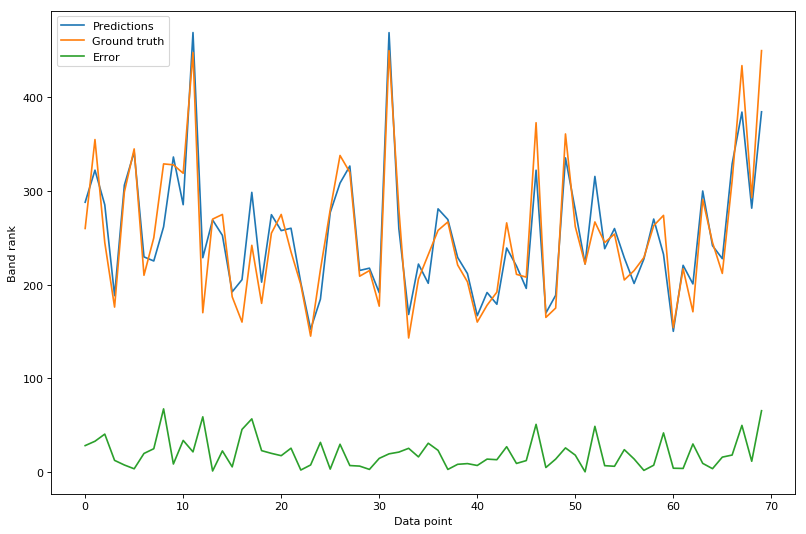

In [209]:
import matplotlib.pyplot as plt

excerpt_size = 70

fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(predictions[:excerpt_size])
plt.plot(target_val[:excerpt_size])
plt.plot(abs(predictions-target_val)[:excerpt_size])

plt.legend(['Predictions', 'Ground truth', 'Error'])
plt.xlabel('Data point')
plt.ylabel('Band rank')

# 4a. Interpreting results responsibly

### K-fold cross validation has confirmed our intuition that given the individual instrument difficulty, we can reasonably predict the band difficulty. 

### It's important to critique your model - not just its performance but all the design choices made leading up to measuring its performance.

### If one is too eager to confirm their own hypothesis, one could start to think their model can do a lot more than it actually can. Be mindful and honest with yourself.

# 4b. Training on the full training set

In [210]:
model_f = LinearRegression()
model_f.fit(data_train, target_train)
predictions = model_f.predict(data_test)
mse_f = mean_squared_error(predictions, target_test)
r2_f = r2_score(predictions, target_test)

print(f'Mean squared error: {mse_f}')
print(f'R2 score: {r2_f}')

Mean squared error: 795.1097551052441
R2 score: 0.8143130208102731


Text(0, 0.5, 'Band rank')

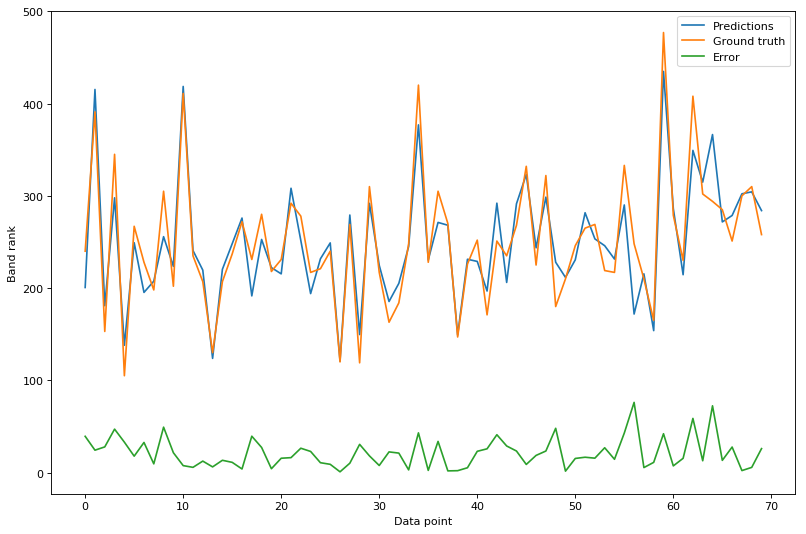

In [211]:
excerpt_size = 70

fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(predictions[:excerpt_size])
plt.plot(target_test[:excerpt_size])
plt.plot(abs(predictions-target_test)[:excerpt_size])

plt.legend(['Predictions', 'Ground truth', 'Error'])
plt.xlabel('Data point')
plt.ylabel('Band rank')

# 5. Feature selection: Which instrument tells us the most about the band difficulty?

In [212]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(data_train, target_train)

In [213]:
instruments = ['Guitar', 'Drums', 'Bass', 'Vocals']

for i in range(len(instruments)):
    print(f'Band difficulty dependency on {instruments[i]} difficulty:  \t{mutual_info[i]:.3f}\n')

Band difficulty dependency on Guitar difficulty:  	0.599

Band difficulty dependency on Drums difficulty:  	0.566

Band difficulty dependency on Bass difficulty:  	0.492

Band difficulty dependency on Vocals difficulty:  	0.209



# 6. Feature engineering: Can we create a new feature?

In [214]:
num_solos = np.zeros(len(df_band))

i = 0
for _, row in df_band.iterrows():
    num_solos[i] = row['Guitar Solos'] + row['Drums Solos'] + row['Bass Solos']
    i += 1

num_solos = np.delete(num_solos, 1844)

In [215]:
print(np.argwhere(np.isnan(num_solos)))

[[1779]
 [1844]
 [1846]
 [1848]
 [1850]
 [1910]
 [1912]
 [1914]
 [1916]
 [1917]
 [1919]
 [1922]
 [1924]
 [1925]
 [1927]
 [1928]
 [1930]
 [1932]
 [1934]
 [1936]
 [1937]
 [1939]
 [1944]
 [1946]
 [1948]
 [1949]
 [1952]]


In [216]:
print(f'Data array size before appending new feature: {data.shape}')
data = np.append(data, num_solos[:, None], axis=1)
print(f'Data array size after appending new feature: {data.shape}')

Data array size before appending new feature: (2725, 4)
Data array size after appending new feature: (2725, 5)


In [217]:
rows_to_remove = [row[0] for row in np.argwhere(np.isnan(num_solos))]
data = np.delete(data, rows_to_remove, axis=0)
target = np.delete(target, rows_to_remove)

In [218]:
print(np.isnan(data).any(), data.shape)
print(np.isnan(target).any(), target.shape)
num_songs = len(target)
print(f'Remaining songs: {num_songs}')

False (2698, 5)
False (2698,)
Remaining songs: 2698


In [219]:
data_train_fe, data_test_fe, target_train_fe, target_test_fe = train_test_split(data, target, test_size=0.2, random_state=98)

In [220]:
model_fe = LinearRegression()
model_fe.fit(data_train_fe, target_train_fe)
predictions_fe = model_fe.predict(data_test_fe)
mse_fe = mean_squared_error(predictions_fe, target_test_fe)
r2_fe = r2_score(predictions_fe, target_test_fe)

print(f'Mean squared error: {mse_fe}')
print(f'R2 score: {r2_fe}')

Mean squared error: 761.6431267691449
R2 score: 0.7975153532803522


# Conclusion / Moving forward